In [83]:
%matplotlib inline
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42

# Plot settings

In [84]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, NullFormatter, FixedLocator
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

In [169]:
plt.style.use("seaborn-ticks")

config = dict(fontsize=8)
plt.rcParams['font.family'] = "Roboto"
plt.rcParams['font.size'] = config['fontsize']
#plt.rcParams['font.weight'] = "bold"
plt.rcParams['axes.labelsize'] = config['fontsize']
plt.rcParams['xtick.labelsize'] = config['fontsize']
plt.rcParams['ytick.labelsize'] = config['fontsize']
plt.rcParams['legend.fontsize'] = config['fontsize']
plt.rcParams['xtick.minor.pad'] = 1
plt.rcParams['ytick.minor.pad'] = 1

#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'regular'
#plt.rcParams['font.sans-serif'] = 'PT Sans'
#plt.rcParams['font.monospace'] = 'PT Sans Mono'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelweight'] = 'semibold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 9

# Dummy data

In [170]:
MCM = np.abs(np.load("./MCMs.npz"))
R = MCM
n = 5

In [171]:
ticks = np.linspace(-0.5, 4*n -0.5, 5)

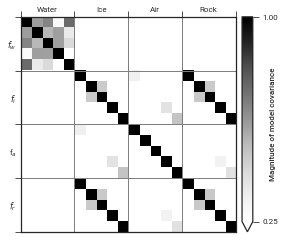

In [186]:
# Plot

fig, ax = plt.subplots(figsize=(4,4))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad="3%")

lower_limit = 0.25
im = ax.imshow(R, cmap="Greys", vmin=lower_limit, vmax=1)
cbar = fig.colorbar(im, orientation="vertical", cax=cax, pad=0, extend="min")
cbar.set_label(label="Magnitude of model covariance", labelpad=-8)
cbar.set_ticks([lower_limit, 1])
#cbar.set_ticklabels(["-1", " 1"])

ax.set_aspect("equal")
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlim(-0.5, 4*n - 0.5)
ax.set_ylim(-0.5, 4*n - 0.5)

ax.invert_yaxis()
ax.xaxis.tick_top()

minorLocator = FixedLocator(ticks[:-1] + n/2)
majorFormatter = NullFormatter()
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_formatter(majorFormatter)

ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

labels = ["$f_w$", "$f_i$", "f$_a$", "$f_r$"]
long_labels = ["Water", "Ice", "Air","Rock"]
ax.set_xticklabels(long_labels, minor=True)
ax.set_yticklabels(labels, minor=True)

ax.tick_params(axis='x', which='minor', top=False)
ax.tick_params(axis='y', which='minor', left=False)

ax.grid(which="major", color="0.5", linestyle='-', linewidth=1)

fig.tight_layout()
fig.savefig("../../manuscripts/1_theory_and_implementation/Fig3_one_column.pdf", pad_inches=0, bbox_inches="tight")

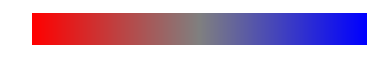

In [155]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

def display_cmap(cmap):
    plt.imshow(np.linspace(0, 100, 256)[None, :],  aspect=25,    interpolation='nearest', cmap=cmap) 
    plt.axis('off')

basic_cols=['#ff0000', '#808080', '#0000ff']
my_cmap=LinearSegmentedColormap.from_list('mycmap', basic_cols)
display_cmap(my_cmap)
